# The Spark Foundation - Data Science & Business Analytics Internship

### TASK 2 - Prediction using Unsupervised Machine Learning

## Language - Python

## Author - Abdul Hakeem Amer

In [1]:
# Importing python libraries needed:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
import warnings as wg
wg.filterwarnings('ignore')

In [2]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.shape

(150, 6)

In [7]:
#checking null values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris=pd.DataFrame(iris)
iris_iris=iris.drop(columns=["Species","Id"])
iris_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum number of Clusters

In [11]:
within_cluster_sum_of_square = []
clusters_range = range(1, 15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_iris)
    within_cluster_sum_of_square.append(km.inertia_)

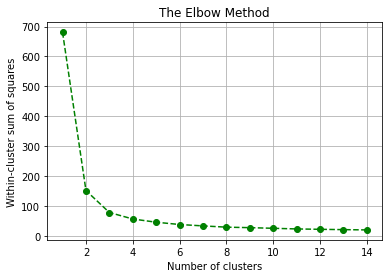

In [12]:
plt.plot(clusters_range,within_cluster_sum_of_square, "go--",color="green")
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.grid()
plt.show()

### Applying k means clustering on data

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init="k-means++",max_iter=300, n_init=10,random_state=0)
predictions = model.fit_predict(iris_iris)

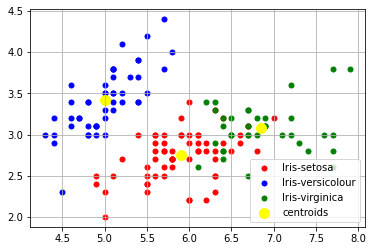

In [14]:
x=iris_iris.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0, 0], x[predictions==0, 1], s=25, c="red", label="Iris-setosa")
plt.scatter(x[predictions==1, 0], x[predictions==1, 1], s=25, c="blue", label="Iris-versicolour")
plt.scatter(x[predictions==2, 0], x[predictions==2, 1], s=25, c="green", label="Iris-virginica")

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c="yellow",label="centroids")
plt.legend()
plt.grid()
plt.show()